# MFCC

**读取数据**

In [5]:
import numpy as np
import wave

# 打开WAV文档
file = wave.open("./data/enhance_speach_input_file.wav")

# 获取语音参数
params = file.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

# 读取波形数据
str_data = file.readframes(nframes)
file.close() # 关闭文件

# 将波形数据转换为数组
x = np.frombuffer(str_data, dtype=np.short)

print('采样频率：\n',framerate)
print('语音数据：\n',x.shape)
print('音频采样点数和音频通道数：\n',nframes, nchannels)

采样频率：
 16000
语音数据：
 (190224,)
音频采样点数和音频通道数：
 190224 1


**显示音频时域图**

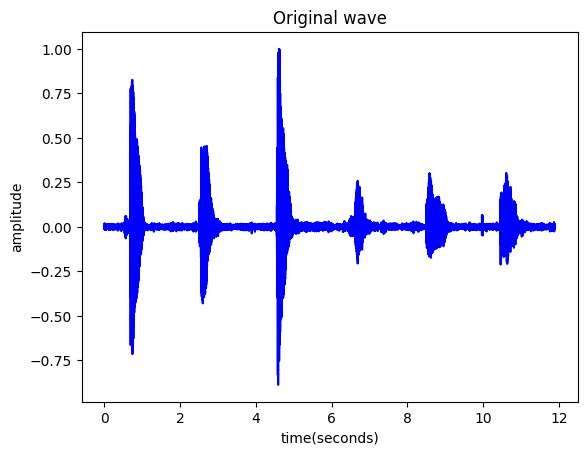

In [6]:
import matplotlib.pyplot as plt

# 归一化输入语音
input_x = x * 1.0/max(abs(x))

# 将音频信号规整乘每行一路通道信号的格式，即该矩阵一行为一个通道的采样点，共nchannels行
input_x = np.reshape(input_x,[nframes,nchannels]).T # .T 表示转置

# 绘制输入音频的时域波形
time = np.arange(0,nframes) * (1.0 / framerate)
time = np.reshape(time,[nframes,1]).T
plt.plot(time[0,:nframes],input_x[0,:nframes],c="b")
plt.xlabel("time(seconds)")
plt.ylabel("amplitude")
plt.title("Original wave")
plt.show()

**计算MFCC**

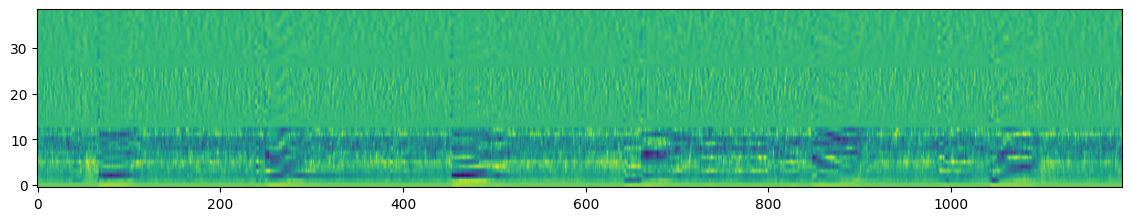

In [16]:
from python_speech_features import *
import numpy as np


def get_mfcc(data, fs, nfilt=26, winfunc=np.hamming):
    
    wav_feature = mfcc(data, fs, nfilt=nfilt, winfunc=winfunc)
    '''
    signal - 需要用来计算特征的音频信号，应该是一个N*1的数组
    samplerate - 我们用来工作的信号的采样率
    winlen - 分析窗口的长度，按秒计，默认0.025s(25ms)
    winstep - 连续窗口之间的步长，按秒计，默认0.01s（10ms）
    numcep - 倒频谱返回的数量，默认13
    nfilt - 滤波器组的滤波器数量，默认26
    nfft - FFT的大小，默认512
    lowfreq - 梅尔滤波器的最低边缘，单位赫兹，默认为0
    highfreq - 梅尔滤波器的最高边缘，单位赫兹，默认为采样率/2
    preemph - 应用预加重过滤器和预加重过滤器的系数，0表示没有过滤器，默认0.97
    ceplifter - 将升降器应用于最终的倒谱系数。 0没有升降机。默认值为22。
    appendEnergy - 如果是true，则将第0个倒谱系数替换为总帧能量的对数。 
    '''
    d_mfcc_feat = delta(wav_feature, 1)
    d_mfcc_feat2 = delta(wav_feature, 2)
    feature = np.hstack((wav_feature, d_mfcc_feat, d_mfcc_feat2))
    return feature
    
feature = get_mfcc(x, framerate)
plt.figure(figsize=(14,8))
plt.imshow(feature.T, aspect=5.0, origin="lower")